<img src="mmu_logo.png" style="height: 80px;" align=left>  

# Learning Objectives

Towards the end of this lesson, you should be able to:
- apply different techniques to data preprocessing in Python

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

## Dealing with missing values

Read the data dictionary/description of your dataset, as missing values sometimes are filled with dummy values.
If you don't have access to the data dictionary, look at the descriptive statistics (mean, min, max) or make use of visualizations to try and make sense of the data. 

In [2]:
age = pd.Series([18,18,19,20,np.nan,14,np.nan])
gender = pd.Series(['male', 'male', 'female', 'female', 'male', 'female', 'male'])

df = pd.DataFrame({'age':age, 'gender':gender})
df

age  gender
0  18.0    male
1  18.0    male
2  19.0  female
3  20.0  female
4   NaN    male
5  14.0  female
6   NaN    male

In [3]:
# Number of NAs in dataframe by column
df.isna().sum()

age       2
gender    0
dtype: int64

In [4]:
# drop all NA for the column gender
# we can drop entire row with NaN, but we must know which column with NaN to drop
# or else we will have data loss
df1 = df.copy()
df1.dropna(subset=['gender'])

age  gender
0  18.0    male
1  18.0    male
2  19.0  female
3  20.0  female
4   NaN    male
5  14.0  female
6   NaN    male

In [5]:
# There are a few ways to deal with missing values, you can either drop all rows containing NA or impute them.
# There are multiple imputation methods (fill with median, MICE...etc) (read more: https://scikit-learn.org/stable/modules/impute.html)
# There are different types of missing data (Missing at random, missing completely at random ...etc)
# Deal with NA accordingly

# your answer here...

# create a copy of df and name it df1, then drop all na. 
# your answer here...
df1 = df.dropna(subset=['gender'])
    
# create a copy of df and name it df2, then fill NA with median of each feature
# your answer here...
df2 = df.fillna(0) #fill NA with median of each feature


# Ting said if there missing value, might as well fill it in with zero, this can prevent from missing records

In [6]:
df1

age  gender
0  18.0    male
1  18.0    male
2  19.0  female
3  20.0  female
4   NaN    male
5  14.0  female
6   NaN    male

In [7]:
df2

age  gender
0  18.0    male
1  18.0    male
2  19.0  female
3  20.0  female
4   0.0    male
5  14.0  female
6   0.0    male

## Dealing with duplicated data

In [8]:
df

age  gender
0  18.0    male
1  18.0    male
2  19.0  female
3  20.0  female
4   NaN    male
5  14.0  female
6   NaN    male

In [10]:
# Drop all the duplicated data...
# your answer here...
df[~df.duplicated()]

# or
df.drop_duplicates()

age  gender
0  18.0    male
2  19.0  female
3  20.0  female
4   NaN    male
5  14.0  female

## Dealing with inconsistencies and noisy data

There are many type of inconsistencies and noise in data.

#### For instance, we know for a fact that some features aren't suppose to have negative values

In [11]:
age = pd.Series([24,21,24,-26,27])
income = pd.Series([3000,2500,3400,4599, -9999])

df = pd.DataFrame({"age":age, "income":income})
df

age  income
0   24    3000
1   21    2500
2   24    3400
3  -26    4599
4   27   -9999

In [12]:
# Replace negative values with nan for age and income

age = age.map(lambda x: np.nan if x < 0 else x)
income = income.map(lambda x: np.nan if x < 0 else x)

In [13]:
age # we can fill in with 0 for NaN

0    24.0
1    21.0
2    24.0
3     NaN
4    27.0
dtype: float64

In [14]:
income

0    3000.0
1    2500.0
2    3400.0
3    4599.0
4       NaN
dtype: float64

In [15]:
# replace all values <0 to 0
df = df.clip(lower=0)

In [16]:
# replace all values >3000 to 3000
df = df.clip(upper=3000)

In [17]:
df

age  income
0   24    3000
1   21    2500
2   24    3000
3    0    3000
4   27       0

#### Cleaning Texts

In [18]:
import re # regular expression

txt = "The rain in Malaysia"
x = re.search("^The.*Mal*", txt)
x

<re.Match object; span=(0, 15), match='The rain in Mal'>

In [19]:
x = re.search("Portugal", txt)
print(x)

None


Some RegEx commands

<img src="regex.png" style="height: 400px;" align=left>  



In [20]:
state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
state

0    \tJohor,Bahru\n\t
1      Sela   ngor\n\t
2           Sabah     
3             Sarawak`
4               Penang
5        123Kel3antan4
6               Ke_dah
7              Pahan?g
dtype: object

In [24]:
# replace all characters/commands that are not a-z and A-Z
# your answer...

state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
state = state.replace('[^A-Za-z]', '', regex=True) # for series not string
state

0    JohorBahru
1      Selangor
2         Sabah
3       Sarawak
4        Penang
5      Kelantan
6         Kedah
7        Pahang
dtype: object

In [26]:
# there are many ways we can clean this data using regex, since we know the state only consist of alphabets we can do:
# your answer...

state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
state = state.replace('[^A-Za-z]', '', regex=True).replace('JohorBahru','Johor Bahru')
state

0    Johor Bahru
1       Selangor
2          Sabah
3        Sarawak
4         Penang
5       Kelantan
6          Kedah
7         Pahang
dtype: object

# Data Normalization and Standardization

#### Most common normalization techniques are
- Min-max
- Z-score normalization (Standardization)

#### Min-max will transform your data into a distribution of [0,1]
#### Standardization will transform your data such that the mean is 0 and standard deviation is 1.

In [31]:
from sklearn.preprocessing import StandardScaler  # z-score / standardization
from sklearn.preprocessing import MinMaxScaler # min max

In [32]:
df = pd.DataFrame({"height_cm": [180,165,170,164,161,183], "weight_kgs": [60,50,43,46,55,76]})
df["height_ft"] = df["height_cm"]*0.0328084

In [33]:
df # we do normalization/standardization just so that ML model wont be influence by the range

height_cm  weight_kgs  height_ft
0        180          60   5.905512
1        165          50   5.413386
2        170          43   5.577428
3        164          46   5.380578
4        161          55   5.282152
5        183          76   6.003937

#### Min-Max

In [34]:
# Min Max
features_to_scale = ["height_cm", "height_ft", "weight_kgs"]
to_scale = df[features_to_scale]

min_max_scaler = MinMaxScaler()
# your answer here...
x_scaled = min_max_scaler.fit_transform(to_scale)
x_scaled = pd.DataFrame(x_scaled, columns = features_to_scale)
x_scaled # smallest value in the column will be set to 0, highest become 1

height_cm  height_ft  weight_kgs
0   0.863636   0.863636    0.515152
1   0.181818   0.181818    0.212121
2   0.409091   0.409091    0.000000
3   0.136364   0.136364    0.090909
4   0.000000   0.000000    0.363636
5   1.000000   1.000000    1.000000

#### Z-Score (Standardization)

In [35]:
# Z-Score
features_to_scale = ["height_cm", "height_ft", "weight_kgs"]
to_scale = df[features_to_scale]

standard_scaler = StandardScaler()
# your answer here...
x_scaled = standard_scaler .fit_transform(to_scale)
x_scaled = pd.DataFrame(x_scaled, columns = features_to_scale)

In [36]:
x_scaled

height_cm  height_ft  weight_kgs
0   1.149932   1.149932    0.457709
1  -0.665750  -0.665750   -0.457709
2  -0.060523  -0.060523   -1.098501
3  -0.786796  -0.786796   -0.823876
4  -1.149932  -1.149932    0.000000
5   1.513069   1.513069    1.922376

## Discretization

#### Discretizing time of day into labels

In [37]:
timestamp = pd.date_range("2020-06-22 05:00:00", "2020-06-22 23:59:59", freq='H')

In [38]:
df = pd.DataFrame({"timestamp":timestamp, "date":timestamp.date, "hour_of_day":timestamp.hour})
df

timestamp        date  hour_of_day
0  2020-06-22 05:00:00  2020-06-22            5
1  2020-06-22 06:00:00  2020-06-22            6
2  2020-06-22 07:00:00  2020-06-22            7
3  2020-06-22 08:00:00  2020-06-22            8
4  2020-06-22 09:00:00  2020-06-22            9
5  2020-06-22 10:00:00  2020-06-22           10
6  2020-06-22 11:00:00  2020-06-22           11
7  2020-06-22 12:00:00  2020-06-22           12
8  2020-06-22 13:00:00  2020-06-22           13
9  2020-06-22 14:00:00  2020-06-22           14
10 2020-06-22 15:00:00  2020-06-22           15
11 2020-06-22 16:00:00  2020-06-22           16
12 2020-06-22 17:00:00  2020-06-22           17
13 2020-06-22 18:00:00  2020-06-22           18
14 2020-06-22 19:00:00  2020-06-22           19
15 2020-06-22 20:00:00  2020-06-22           20
16 2020-06-22 21:00:00  2020-06-22           21
17 2020-06-22 22:00:00  2020-06-22           22
18 2020-06-22 23:00:00  2020-06-22           23

In [39]:
df["parts_of_day"] = pd.cut(df["hour_of_day"], bins=[-1,11,17,23], labels=["Morning", "Afternoon", "Evening"])

# bins can be used to group data, 11 - morning, 17 - afternoon

In [40]:
df

timestamp        date  hour_of_day parts_of_day
0  2020-06-22 05:00:00  2020-06-22            5      Morning
1  2020-06-22 06:00:00  2020-06-22            6      Morning
2  2020-06-22 07:00:00  2020-06-22            7      Morning
3  2020-06-22 08:00:00  2020-06-22            8      Morning
4  2020-06-22 09:00:00  2020-06-22            9      Morning
5  2020-06-22 10:00:00  2020-06-22           10      Morning
6  2020-06-22 11:00:00  2020-06-22           11      Morning
7  2020-06-22 12:00:00  2020-06-22           12    Afternoon
8  2020-06-22 13:00:00  2020-06-22           13    Afternoon
9  2020-06-22 14:00:00  2020-06-22           14    Afternoon
10 2020-06-22 15:00:00  2020-06-22           15    Afternoon
11 2020-06-22 16:00:00  2020-06-22           16    Afternoon
12 2020-06-22 17:00:00  2020-06-22           17    Afternoon
13 2020-06-22 18:00:00  2020-06-22           18      Evening
14 2020-06-22 19:00:00  2020-06-22           19      Evening
15 2020-06-22 20:00:00  2020-06-22           20      Evening
16 2020-06-22 21:00:00  2020-06-22           21      Evening
17 2020-06-22 22:00:00  2020-06-22           22      Evening
18 2020-06-22 23:00:00  2020-06-22           23      Evening

#### Or maybe discretizing income groups

In [63]:
income = pd.Series([3000,4000,3400,5900,4500, 10000, 4900, 12000])

In [64]:
income_group = income.map(lambda x: "high" if x > 5000 else "low")

In [65]:
pd.DataFrame({"income": income, "income_group": income_group})

income income_group
0    3000          low
1    4000          low
2    3400          low
3    5900         high
4    4500          low
5   10000         high
6    4900          low
7   12000         high

## Data Aggregation

In [66]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'], 
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'], 
                   'C': np.random.random_sample(8)*1000, 
                   'D': np.random.random_sample(8)*100})

In [67]:
df

A      B           C          D
0  foo    one  922.218868  29.223476
1  bar    one  681.185105  19.169455
2  foo    two  649.343188  43.826310
3  bar  three  657.071629   3.265399
4  foo    two  168.271891  20.101236
5  bar    two  913.027501   4.987013
6  foo    one  190.987541  82.360159
7  foo  three  823.281329   6.294666

In [69]:
# Group by category A, aggregate C and D by mean
# your answer here...
df.groupby('A').mean()

C          D
A                         
bar  750.428078   9.140622
foo  550.820564  36.361169

In [70]:
# Group by category A, aggregate C and D by sum
# your answer here...
df.groupby('A').sum()

C           D
A                           
bar  2251.284235   27.421867
foo  2754.102818  181.805847

In [71]:
# Group by category A, aggregate C by mean and D by sum
# your answer here...
df.groupby('A').agg({'C':'mean','D':'sum'})

C           D
A                          
bar  750.428078   27.421867
foo  550.820564  181.805847

In [ ]:
# Group by category A and B, aggregate C & D by sum
# your answer here...


## Merging Data

Can use pandas.merge() to do a join (inner, outer, left, right) by key, or simply use pandas.concat() to concatenate by row or column

In [72]:
df = pd.DataFrame({'key': ['key_1', 'key_2', 'key_3'], 
                   'B': np.random.random_sample(3)*1000})
                   
df2 = pd.DataFrame({'key': ['key_1', 'key_2', 'key_3', 'key_4'], 
                   'C': np.random.random_sample(4)*100})
                    
display(df)
df2

key           B
0  key_1  152.104617
1  key_2  608.225634
2  key_3  441.819081

key          C
0  key_1  70.712809
1  key_2  37.899871
2  key_3  16.590155
3  key_4  28.616033

#### merge by key

In [73]:
df.merge(df2, on="key", how="outer") # same concept as sql joins

key           B          C
0  key_1  152.104617  70.712809
1  key_2  608.225634  37.899871
2  key_3  441.819081  16.590155
3  key_4         NaN  28.616033

#### concat simply adds the data in

In [74]:
pd.concat([df,df2], sort=True, axis=0) # by row

B          C    key
0  152.104617        NaN  key_1
1  608.225634        NaN  key_2
2  441.819081        NaN  key_3
0         NaN  70.712809  key_1
1         NaN  37.899871  key_2
2         NaN  16.590155  key_3
3         NaN  28.616033  key_4

In [75]:
pd.concat([df,df2], sort=True, axis=1) # by column

key           B    key          C
0  key_1  152.104617  key_1  70.712809
1  key_2  608.225634  key_2  37.899871
2  key_3  441.819081  key_3  16.590155
3    NaN         NaN  key_4  28.616033

## Dealing with imbalance data
Two ways of dealing with imbalance data
- Oversampling the minority class
- Undersampling the majority class

There are also a few ways of oversampling and undersampling.
#### Oversampling
- Random Oversampling (Randomly selecting samples from the minority class and adding into the training set, can cause overfitting)
- Generating synthetic data (SMOTE)

#### Undersampling
- Random Under-sampling (Randomly removing samples from the majority class - loss of information)
- Edited Nearest Neighbor

For more information: https://imbalanced-learn.readthedocs.io/en/stable/api.html

In [77]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()

In [4]:
bc = datasets.load_breast_cancer(return_X_y = True, as_frame=True)
bc = pd.concat([bc[0], bc[1]], 1)

C:\Users\User\AppData\Local\Temp\ipykernel_217096\11753127.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  bc = pd.concat([bc[0], bc[1]], 1)


In [7]:
bc

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

1    357
0    212
Name: target, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

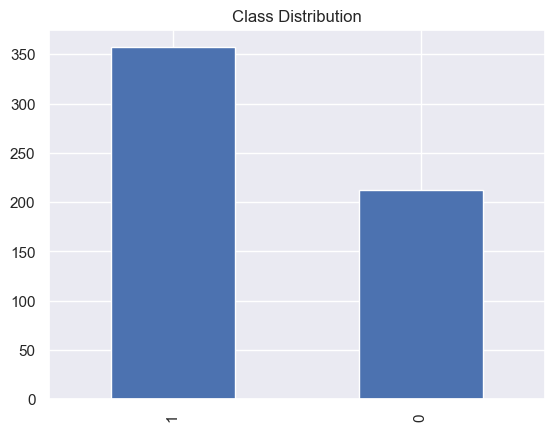

In [8]:
print(bc["target"].value_counts())
bc["target"].value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [9]:
# SMOTE

# Since all features are numeric, we'll use SMOTE. If there are categorical data in your dataset you can use SMOTENC. Read the docs
smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)

In [12]:
# SMOTE uses knn to find nearest neighbor, so it might be a good idea to normalize your data beforehand.

# Min Max
X = bc.drop("target", 1) #drop target column
y = bc["target"]
features = X.columns

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns = features)
x_scaled.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_217096\1748966040.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bc.drop("target", 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  

[2 rows x 30 columns]

In [13]:
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [14]:
# Fit smote
X_res, y_res = smt.fit_resample(x_scaled, y)

0    357
1    357
Name: target, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

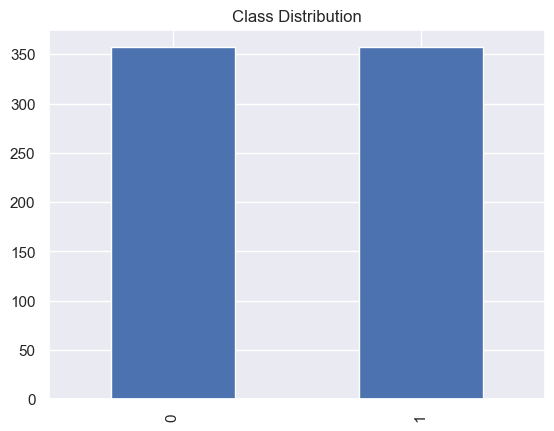

In [15]:
# after oversampling with SMOTE
print(y_res.value_counts())
y_res.value_counts().plot(kind="bar")
plt.title("Class Distribution")

## Data Reduction

#### Chi-squared test

In [16]:
from sklearn.feature_selection import chi2 # chi-squared test
from sklearn.feature_selection import SelectKBest

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [17]:
# Continue using variables from oversampling (X_res, y_res)
# your answer here...
select_feature = SelectKBest(chi2, k=5).fit(X_res, y_res) # TOP 5 variables

kbest = np.asarray(X_res.columns)[select_feature.get_support()]
kbest

array(['mean concavity', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'], dtype=object)

<AxesSubplot:xlabel='score', ylabel='Feature'>

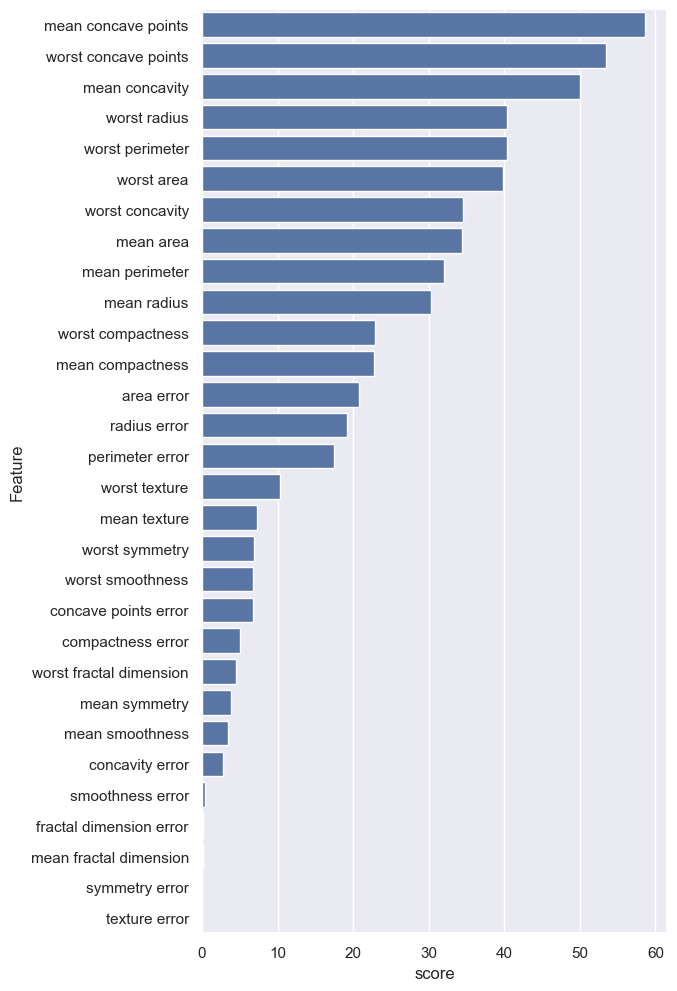

In [18]:
score = pd.DataFrame(select_feature.scores_ , X_res.columns).sort_values(0, ascending=False).reset_index().rename(columns={0:"score", "index":"Feature"})

f, ax = plt.subplots(figsize=(6,12))

sns.barplot(data=score, x='score', y='Feature', color='b')

# Correlation

Identify Highly Correlated Features

<AxesSubplot:>

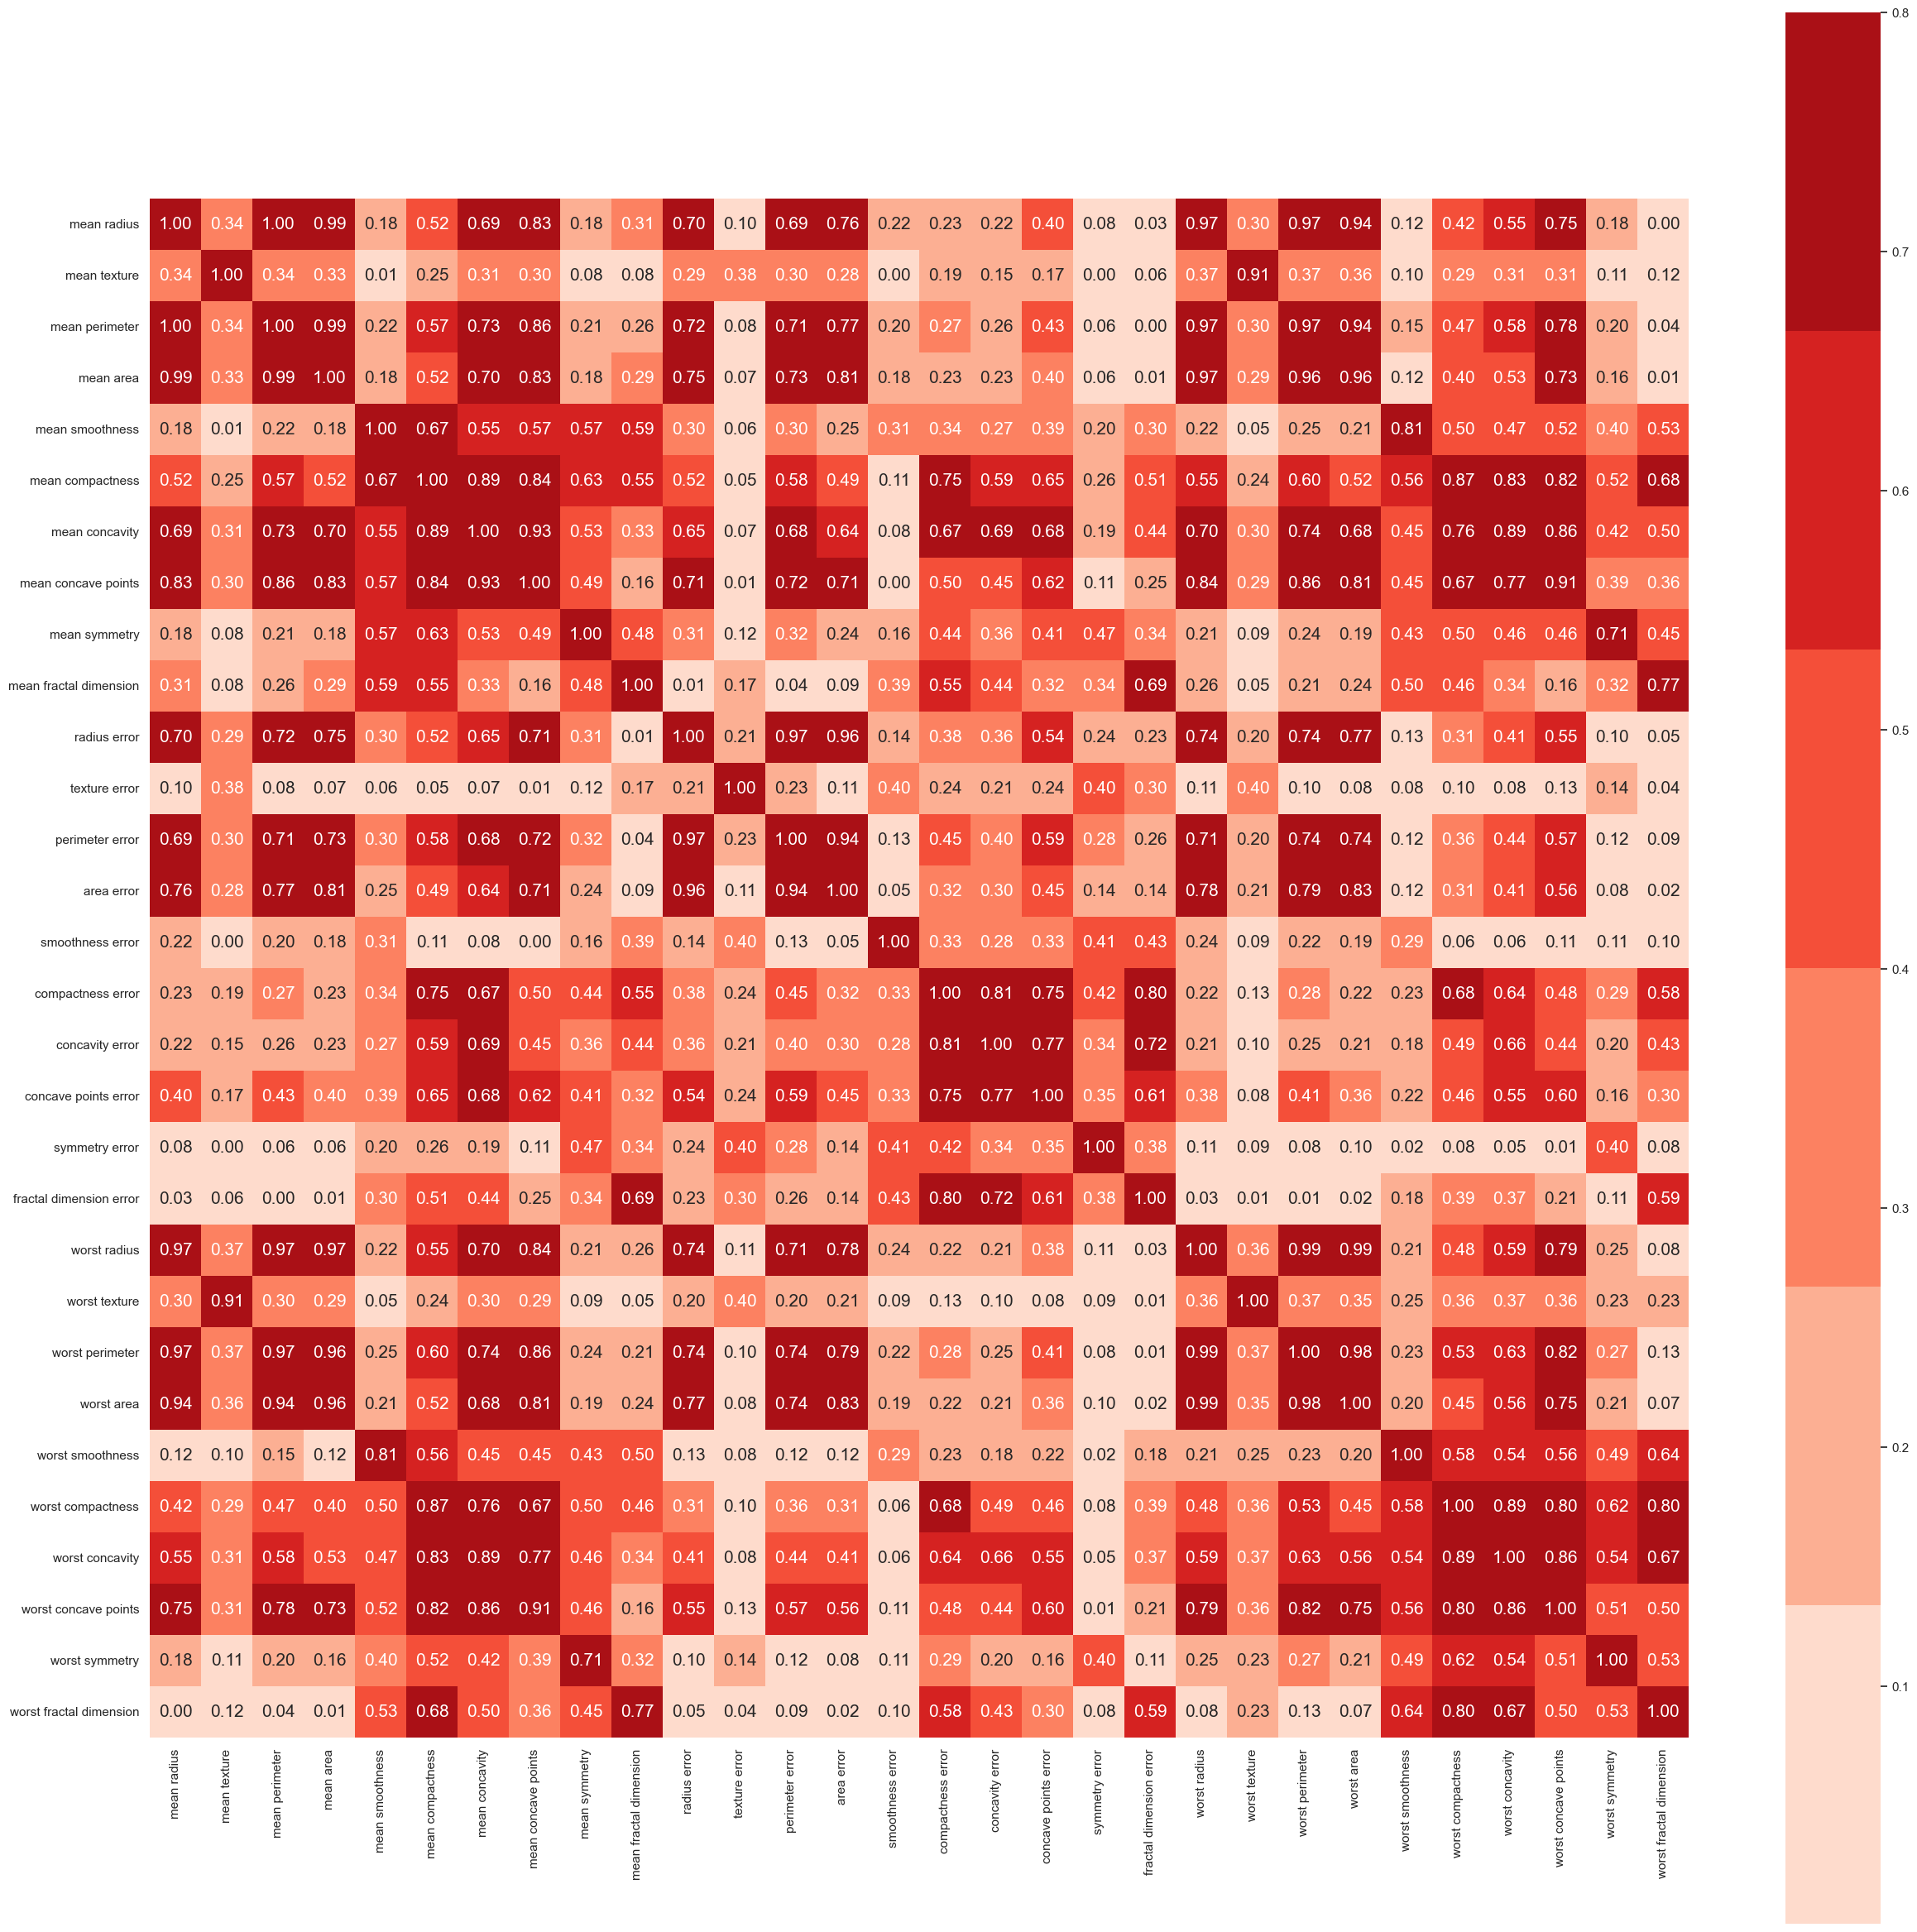

In [19]:
corr_matrix  = X_res.corr().abs()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

In [20]:
# Select upper triangle of correlation matrix
# your answer here...
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
# your answer here...
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

C:\Users\User\AppData\Local\Temp\ipykernel_217096\2299752390.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [21]:
to_drop

['mean perimeter',
 'mean area',
 'perimeter error',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area']

# Label Encode New Data

It represents a variable. Lecturer said this is important for Assignment/Project

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated.

## Load Libraries


In [41]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

## Create a DataFrame

In [42]:
df = pd.DataFrame({'GENDER': {0: 'M',
  1: 'F',
  2: 'M',
  3: 'M',
  4: 'F',
  5: 'F',
  6: 'M',
  7: 'F',
  8: 'M',
  9: 'F'},
 'MONTH': {0: 'JAN',
  1: 'FEB',
  2: 'JAN',
  3: 'MARCH',
  4: 'FEB',
  5: 'JUNE',
  6: 'AUGUST',
  7: 'FEB',
  8: 'JAN',
  9: 'FEB'},
 'CITY': {0: 'KL',
  1: 'KEDAH',
  2: 'SELANGOR',
  3: 'PINENG',
  4: 'PERLIS',
  5: 'JOHOR',
  6: 'KEDAH',
  7: 'SELANGOR',
  8: 'KL',
  9: 'PERAK'},
 'OCCUPATION': {0: 'MANAGER',
  1: 'DOCTOR',
  2: 'EXECUTIVE',
  3: 'CLERK',
  4: 'LECTURER',
  5: 'SUPERVISOR',
  6: 'CLEANER',
  7: 'TAILOR',
  8: 'TEACHER',
  9: 'PILOT'},
 'SUSPICIOUS': {0: 'Y',
  1: 'Y',
  2: 'N',
  3: 'Y',
  4: 'N',
  5: 'N',
  6: 'N',
  7: 'Y',
  8: 'N',
  9: 'Y'}})

df

GENDER   MONTH      CITY  OCCUPATION SUSPICIOUS
0      M     JAN        KL     MANAGER          Y
1      F     FEB     KEDAH      DOCTOR          Y
2      M     JAN  SELANGOR   EXECUTIVE          N
3      M   MARCH    PINENG       CLERK          Y
4      F     FEB    PERLIS    LECTURER          N
5      F    JUNE     JOHOR  SUPERVISOR          N
6      M  AUGUST     KEDAH     CLEANER          N
7      F     FEB  SELANGOR      TAILOR          Y
8      M     JAN        KL     TEACHER          N
9      F     FEB     PERAK       PILOT          Y

## Label Encode the Dataset

In [43]:
# Encoding the variable
d = defaultdict(LabelEncoder)

fit = df.apply(lambda x: d[x.name].fit_transform(x))
fit

GENDER  MONTH  CITY  OCCUPATION  SUSPICIOUS
0       1      2     2           5           1
1       0      1     1           2           1
2       1      2     6           3           0
3       1      4     5           1           1
4       0      1     4           4           0
5       0      3     0           7           0
6       1      0     1           0           0
7       0      1     6           8           1
8       1      2     2           9           0
9       0      1     3           6           1

In [44]:
# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

GENDER   MONTH      CITY  OCCUPATION SUSPICIOUS
0      M     JAN        KL     MANAGER          Y
1      F     FEB     KEDAH      DOCTOR          Y
2      M     JAN  SELANGOR   EXECUTIVE          N
3      M   MARCH    PINENG       CLERK          Y
4      F     FEB    PERLIS    LECTURER          N
5      F    JUNE     JOHOR  SUPERVISOR          N
6      M  AUGUST     KEDAH     CLEANER          N
7      F     FEB  SELANGOR      TAILOR          Y
8      M     JAN        KL     TEACHER          N
9      F     FEB     PERAK       PILOT          Y

## New Data

In [ ]:
newData = pd.DataFrame({
    'GENDER':['F'],
    'MONTH':['FEB'],
    'CITY':['KL']
})

newData

In [ ]:
# Using the dictionary to label future data
